In [1]:
import sys
import os
sys.path.append("../../src")
sys.path.append("../../data")
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython import display
import pylab as pl

from WSMBSS import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Sparse_Dictionary_Learning'

In [2]:
image_paths = '../../data/Olshaussen'
X = scipy.io.loadmat(os.path.join(image_paths,'imagepatcheselfwhitened.mat'))['imagepatches']

In [3]:
INPUT_STD = 0.5
for MixtureIndex in range(X.shape[0]):
    stdx = np.std(X[MixtureIndex,:])
    X[MixtureIndex,:] = X[MixtureIndex,:]/stdx*INPUT_STD

N = X.shape[1]
NumberofMixtures = 144
NumberofSources = 144

MUS = 1.25*1e-4

gammaM_start = [MUS, MUS]
gammaM_stop = [1e-3, 1e-3]
gammaW_start = [MUS, MUS]
gammaW_stop = [1e-3, 1e-3]

MUV = 5
OUTPUT_COMP_TOL = 1e-6
MAX_OUT_ITERATIONS= 3000
LayerActivationArguments = [0,1]
LayerGains = [16,1]
LayerMinimumGains = [1e-6,1]
LayerMaximumGains = [1e6,1]
WScalings = [0.0033, 0.0033]
GamScalings = 0.02
zeta = 0.2*1e-15
beta = 0.05
muD = [0.3125, 0.3125]

s_dim = 144
h_dim = 144
x_dim = X.shape[0]
samples = X.shape[1]

M_H = GamScalings * np.eye(h_dim)
M_Y = GamScalings * np.eye(s_dim)

In [4]:
model = OnlineWSMOlshaussen( s_dim = s_dim, x_dim = x_dim, h_dim = h_dim, 
                             gammaM_start=gammaM_start,
                             gammaM_stop=gammaM_stop,
                             gammaW_start=gammaW_start,
                             gammaW_stop=gammaW_stop, 
                             beta = beta, zeta = zeta, 
                             muD = muD, M_H = M_H, WScalings = WScalings,
                             M_Y = M_Y, DScalings = LayerGains, LayerMinimumGains = LayerMinimumGains,
                             LayerMaximumGains = LayerMaximumGains,neural_OUTPUT_COMP_TOL = OUTPUT_COMP_TOL)

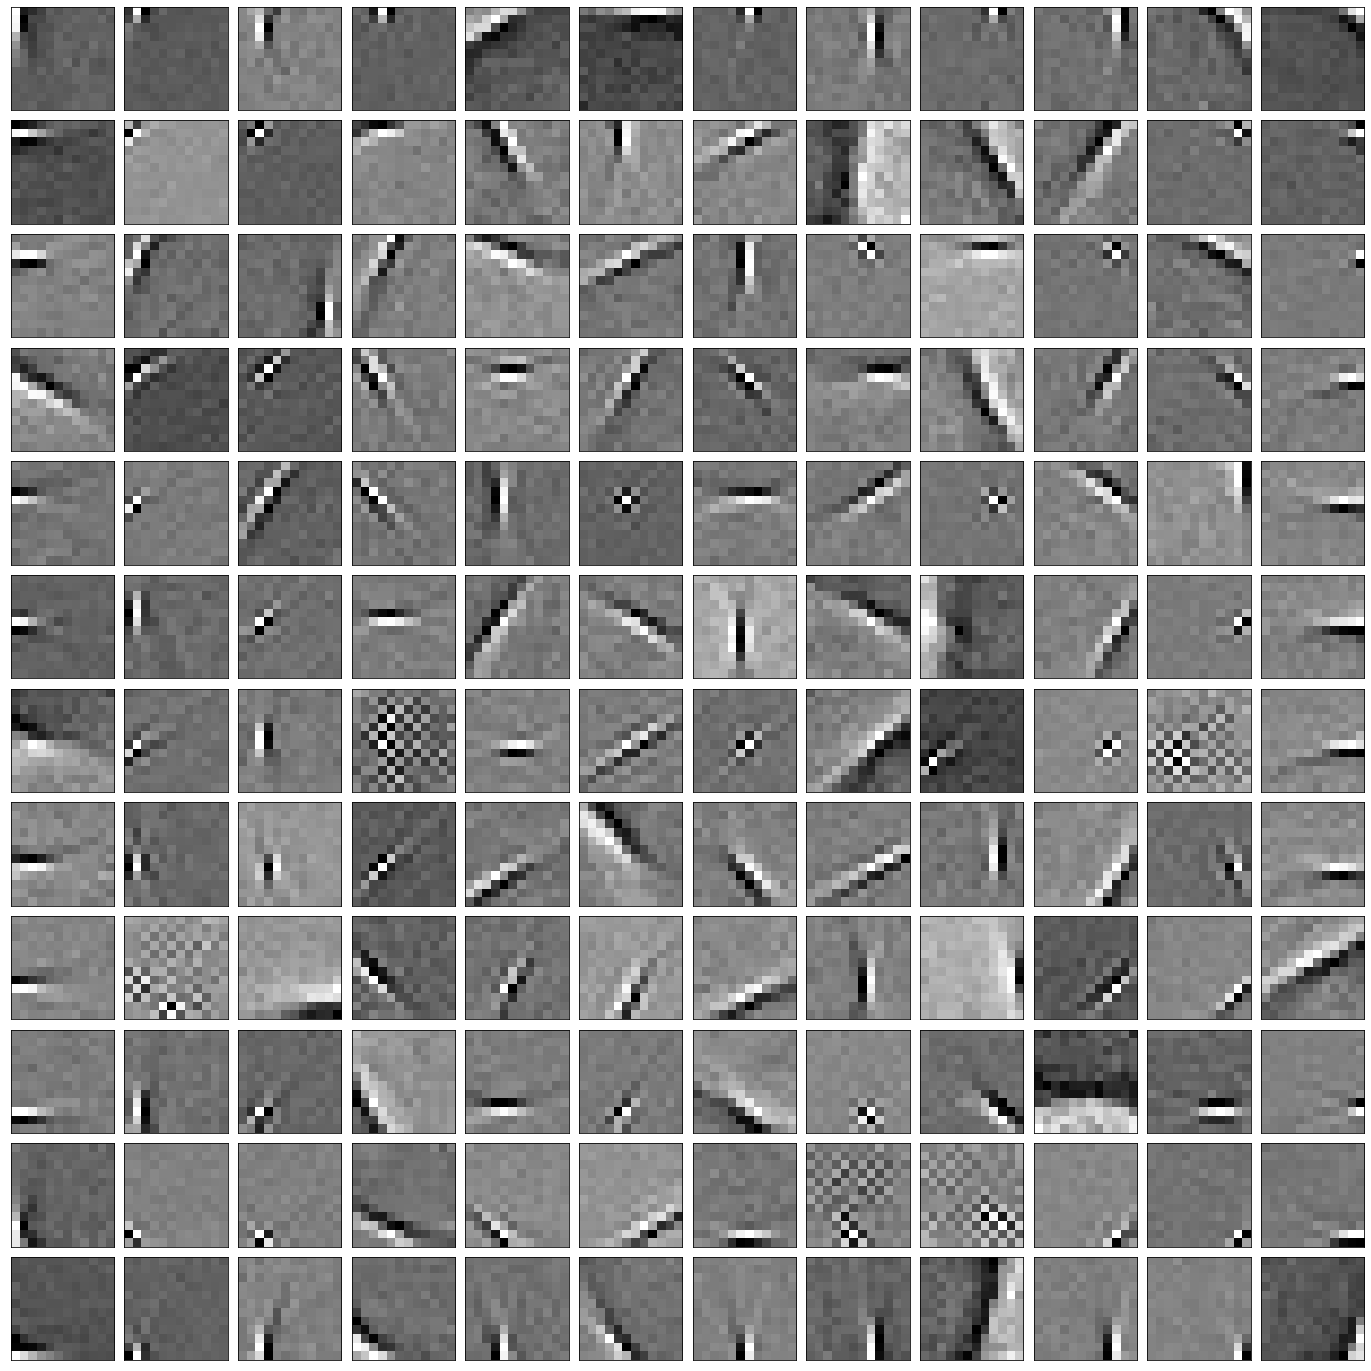

100%|██████████| 312500/312500 [59:43<00:00, 87.22it/s] 


<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

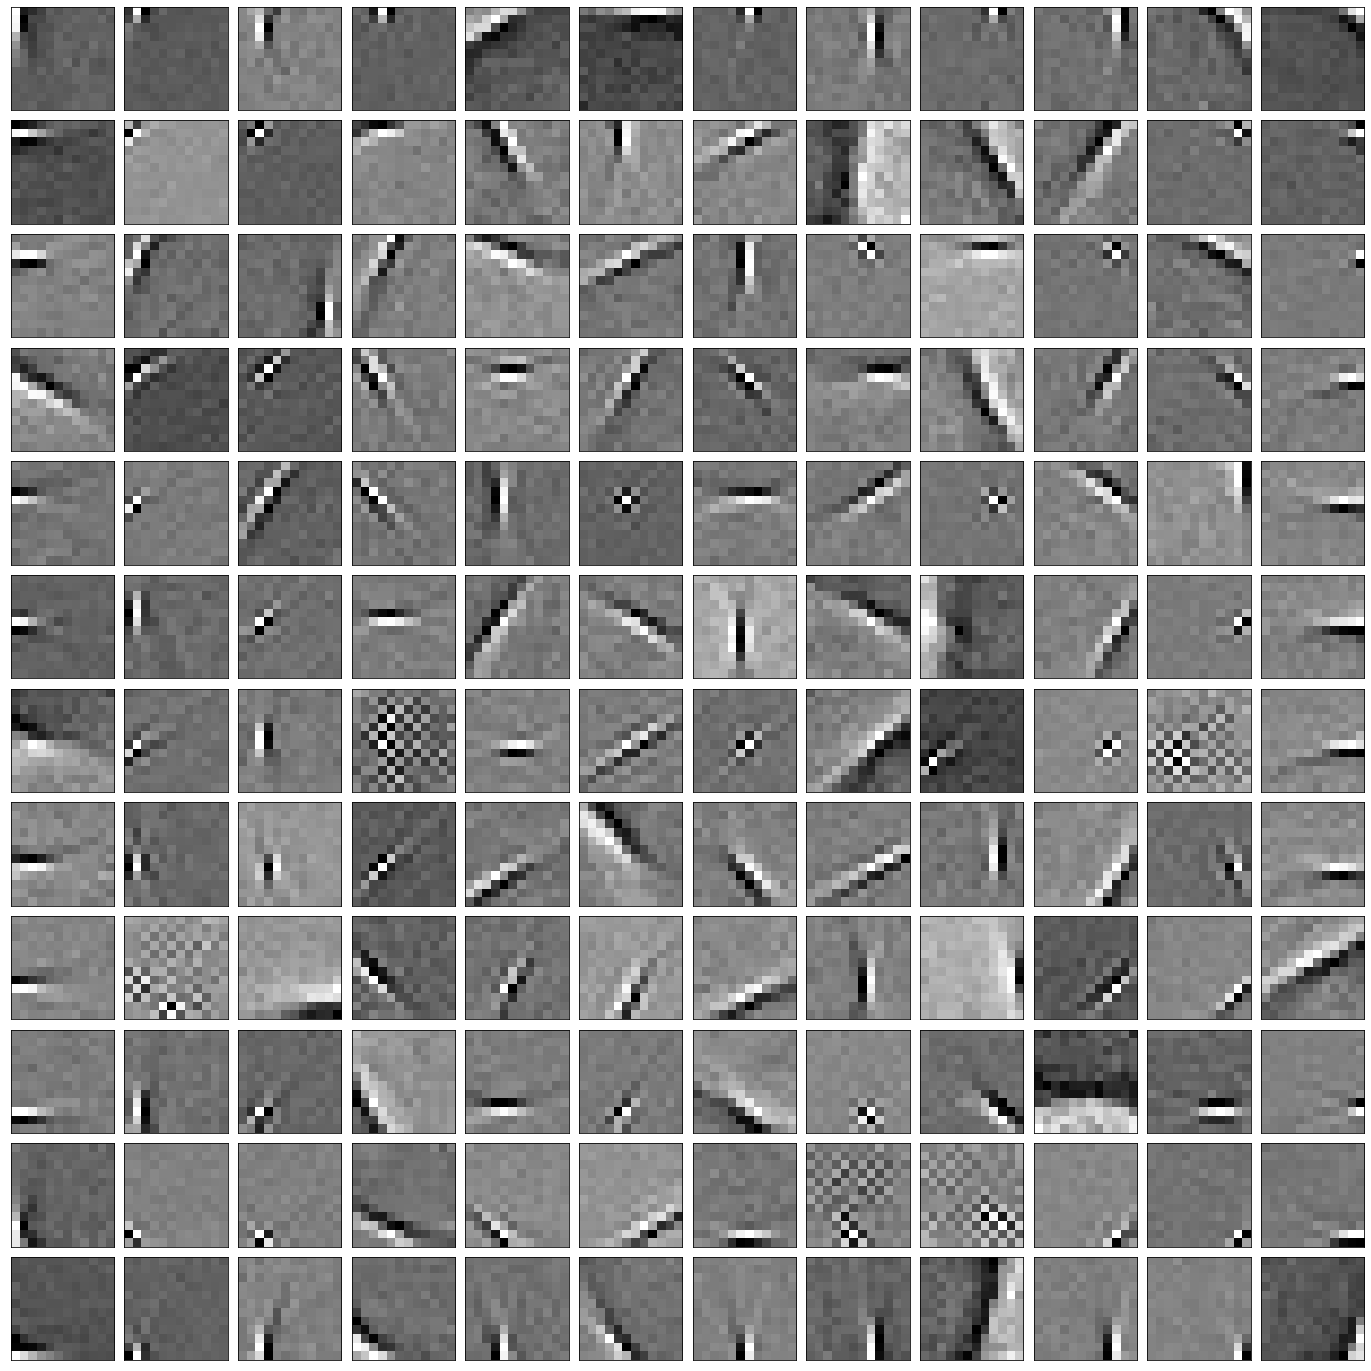

In [5]:
model.fit_batch(X, n_epochs = 1, debug_iteration_point = 5000, plot_rf = True)